1. csv 폴더에서 Sales Records.csv 파일 로드
2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼제거
3. 컬럼의 이름들을 변경 -> ['대륙','국가','상품종류','우선순위','주문일자','발송인자','판매개수','단가','원가']
4. 데이터의 결측치가 존재하는가?
5. 대륙, 국가를 기준으로 오름차순 정렬
6. 인덱스를 재지정(기존 인덱스 제거)
7. 새로운 파생변수 생성
    - 총단가 : 판매개수 * 단가
    - 총원가 : 판매개수 * 원가
    - 총이윤 : 총단가 - 총원가


In [99]:
# 1. csv 폴더에서 Sales Records.csv 파일 로드
import pandas as pd
df = pd.read_csv('../csv/Sales Records.csv')
df.head(2)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.5


In [100]:
# 2. 'Order ID', 'Total Revenue', 'Total Cost', 'Total Profit', 'Sales Channel' 컬럼제거
df1 = df.drop(['Order ID','Total Revenue','Total Cost','Total Profit','Sales Channel'], axis=1).copy()
df1.head(1)

,Region,Country,Item Type,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost
0,Sub-Saharan Africa,Chad,Office Supplies,L,1/27/2011,2/12/2011,4484,651.21,524.96


In [101]:
# 3. 컬럼의 이름들을 변경 -> ['대륙','국가','상품종류','우선순위','주문일자','발송인자','판매개수','단가','원가']
df1.columns = ['대륙','국가','상품종류','우선순위','주문일자','발송인자','판매개수','단가','원가']

In [102]:
# 4. 데이터의 결측치가 존재하는가?
df1.isna().sum()

대륙      0
국가      0
상품종류    0
우선순위    0
주문일자    0
발송인자    0
판매개수    0
단가      0
원가      0
dtype: int64

In [103]:
# 5. 대륙, 국가를 기준으로 오름차순 정렬
df2 = df1.sort_values(by = ['대륙','국가']).copy()

In [104]:
# 6. 인덱스를 재지정(기존 인덱스 제거)
df2.reset_index(drop=True, inplace= True)

In [105]:
# 7. 새로운 파생변수 생성
#    - 총단가 : 판매개수 * 단가
#    - 총원가 : 판매개수 * 원가
#    - 총이윤 : 총단가 - 총원가

df2['총단가'] = df2['판매개수'] * df2['단가']
df2['총원가'] = df2['판매개수'] * df2['원가']
df2['총이윤'] = df2['총단가'] - df2['총원가']

1. 대륙별 총이윤의 합이 가장 높은 대륙은 어디인가?
2. 국가별 총이윤의 합이 가장 높은 상위 10개의 국가는 어디인가?
3. 어떤 상품이 가장 많이 팔린 상품은 무엇인가?

In [106]:
# 1. 대륙별 총이윤의 합이 가장 높은 대륙은 어디인가?
df2.groupby('대륙')['총이윤'].sum().reset_index().sort_values(by = '총이윤',ascending=False).head(1)

,대륙,총이윤
3,Europe,1.027000e+09


In [107]:
# 2. 국가별 총이윤의 합이 가장 높은 상위 10개의 국가는 어디인가?
df2.groupby('국가')['총이윤'].sum().reset_index().sort_values(by='총이윤', ascending=False).reset_index(drop=True).head(10)


,국가,총이윤
0,Kiribati,32454798.26
1,Qatar,30861356.79
2,Grenada,30302769.90
3,Taiwan,30044779.98
4,Malawi,29329125.05
5,Botswana,29019726.67
6,Bangladesh,28092720.77
7,Lithuania,28063374.02
8,Burundi,27911293.45
9,Ireland,27807805.05


In [108]:
# 3. 어떤 상품이 가장 많이 팔린 상품은 무엇인가?
df2.groupby('상품종류').size().reset_index(name = '판매개수').sort_values('판매개수', ascending=False).head(1)

,상품종류,판매개수
9,Personal Care,888


In [113]:
df2[['상품종류','판매개수']].groupby(['상품종류']).sum().sort_values('판매개수', ascending=False)

,판매개수
상품종류,
Personal Care,4402827
Clothes,4352350
Household,4336803
Vegetables,4238098
Cereal,4203394
Baby Food,4197006
Snacks,4122781
Office Supplies,4120263
Cosmetics,4103290


In [124]:
# 그룹화를 할 컬럼이 2개 이상인 경우
# 교수님
#df1[['국가','상품종류','판매개수']].groupby(['국가','상품종류']).sum()
df1[['국가','상품종류','판매개수']].groupby(['국가','상품종류']).agg(['sum','count'])
# 강희
#df1.groupby(['국가','상품종류'])['판매개수'].sum()

판매개수      
                               sum count
국가          상품종류                        
Afghanistan Baby Food         1368     1
            Beverages        14380     3
            Cereal           54917     9
            Clothes          29887     5
            Cosmetics        12177     4
...                            ...   ...
Zimbabwe    Meat              9640     1
            Office Supplies  17447     4
            Personal Care    18478     2
            Snacks           16314     3
            Vegetables       33945     5

[2198 rows x 2 columns]

In [110]:
# 4. 한국은 국가별 총이윤의 합이 가장 높은 상위 몇번째 국가인가?  48위
df3 = df2.groupby('국가')['총이윤'].sum().reset_index().sort_values('총이윤',ascending=False).reset_index(drop = True).copy()
df3.head()
df3.index += 1
df3.loc[df3['국가']=='South Korea']

,국가,총이윤
48,South Korea,23893933.75


In [139]:
## pivot_table()
## pandas 에 내장된 함수
pivot_data = pd.pivot_table(
    df2,
    index = '대륙',
    #columns = '상품종류',
    values = '판매개수',
    aggfunc = 'sum',
    margins = True,
    fill_value = 0,
    )

In [ ]:
pivot_data.plot(kind='bar')

<AxesSubplot:>

/Users/kang_hiee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kang_hiee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kang_hiee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kang_hiee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kang_hiee/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kang_hiee/opt/anaconda3/lib/python3.9/site

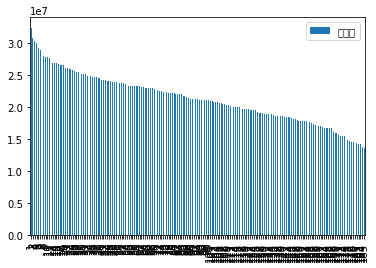

In [142]:
df3.plot(kind='bar')

In [143]:
import matplotlib.pyplot as plt

In [152]:
df3

,총이윤
국가,
Kiribati,32454798.26
Qatar,30861356.79
Grenada,30302769.90
Taiwan,30044779.98
Malawi,29329125.05
...,...
Cape Verde,14383303.52
Italy,14199991.25
Malta,14163744.55


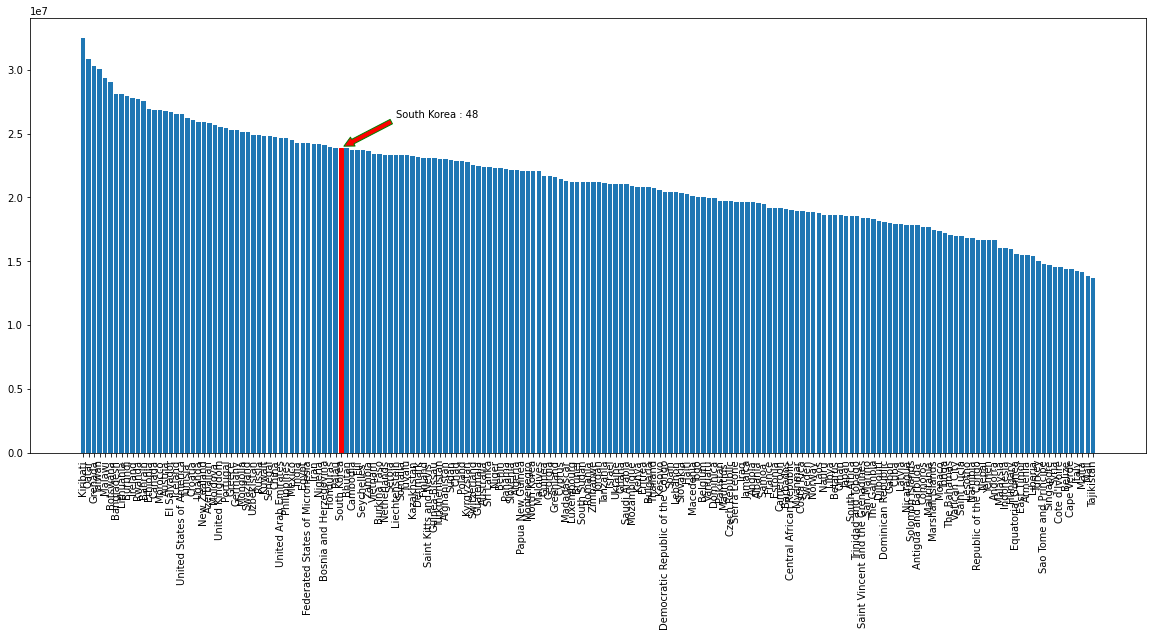

In [164]:
#df3 = df3.set_index('국가')
# 막대그래프 생성
x = df3.index
y = df3['총이윤']

korea_rank = list(df3.index).index('South Korea')
korea_value = df3.loc['South Korea', '총이윤']

#그래프의 사이즈를 변경
plt.figure(figsize = (20,8))
graph = plt.bar(x,y)
graph[korea_rank].set_color('r')
#x축의 데이터들을 회전
plt.xticks(rotation = 90)

#그래프에 주석을 추가
plt.annotate(
    f"South Korea : {korea_rank + 1}",
    xy = (korea_rank, korea_value),  # 화살표가 지정되는 좌표
    xytext = (korea_rank + 10, korea_value * 1.1), # 주석의 좌표
    arrowprops = {
        'facecolor' : 'r', # 화살표 내부의 색을 지정
        'edgecolor' : 'g', # 화살표 테두리의 색을 지정
        'headwidth' : 10,  # 화살표 머리의 너비
        'headlength' : 10, # 화살표 머리의 길이
        'width' : 5,       # 화살표 꼬리의 너비
        'shrink' : 0.05    # 화살표와 주석의 거리
    }
)

plt.show()